## Clase 9
### Regresión simple, múltiple, ...

In [1]:
%ls datasets

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


In [2]:
import pandas as pd

In [52]:
df = pd.read_csv('datasets/reg_data.csv')
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master
5,Female,1700,42,Washington,60.0,Ford,Master
6,Male,3000,50,Washington,77.0,Ford,No
7,Male,3000,55,Washington,77.0,Ford,Bachelor
8,Female,2800,31,New York,87.0,Ford,Bachelor
9,Male,2900,46,New York,70.0,GM,Master


In [4]:
df.columns

Index(['Gender', 'Salary', 'Age', 'Place', 'Weight', 'Company',
       'Academic_degree'],
      dtype='object')

## Introducción
Esta es una base de datos que explica el Salary de 12 personas de diferentes empresas

### Mis variables de interés
- Gender: explica el género de los empleados, es una variable categórica, tiene dos categorías.
- Salary:
- Age:
- Academic_degree:

## Pregunta de Investigación 1:
### Cuál es el impacto de Age en Salary

Salary = b0 +b1*Age

In [10]:
pip install statsmodels

     |████████████████████████████████| 9.8 MB 4.1 MB/s            �███▍                        | 2.3 MB 4.1 MB/s eta 0:00:02
     |████████████████████████████████| 233 kB 42.0 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [12]:
modelA =sm.OLS.from_formula('Salary ~ Age', data = df)
resultA = modelA.fit()
resultA.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0326
Time:                        13:31:25   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observaciones:
- Variable dependiente: Salary
- Variable independiente: Age
- R-squared: 0.380, por lo tanto, este modelo no es tan eficiente porque explica solo el 38% de salary basado...
- Df Model: 1
- Intercept .... > 0.05, no es estafísticamente significativo

`Salary = 349.4458 + 48.0932*Age`

In [16]:
print('Salary of a person whose age is 33:\t', 349.4458+48.0932*33)
df.iloc[:2, :]

Salary of a person whose age is 33:	 1936.5214


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No


In [21]:
print('Diferencia es: \t', 1500-1936.5214)
print('Diferencia es: \t', 1200-1936.5214)
resultA.resid

Diferencia es: 	 -436.5214000000001
Diferencia es: 	 -736.5214000000001


0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

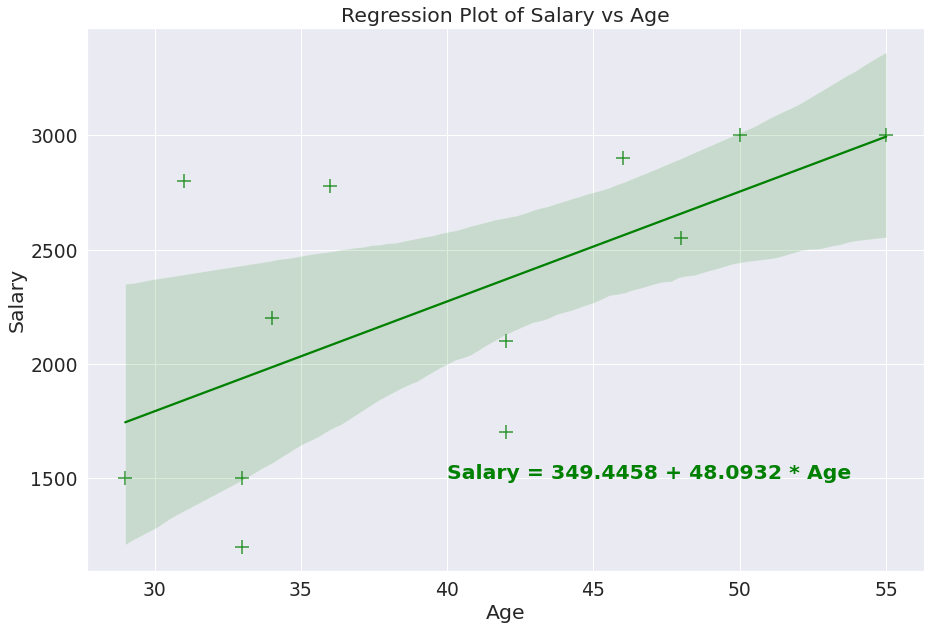

In [31]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.7)

reg_plot = sns.regplot(x = 'Age',
            y = 'Salary',
            data = df,
           marker = '+',
           color = 'green',
           scatter_kws = {'s':200}
           )
reg_plot.set_title('Regression Plot of Salary vs Age')
reg_plot.text(40, 1500, 'Salary = 349.4458 + 48.0932 * Age',
              color = 'green',
              weight = 'semibold',
              size = 'medium'
             )
plt.show()

In [33]:
RESIA = resultA.resid
RESIA

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

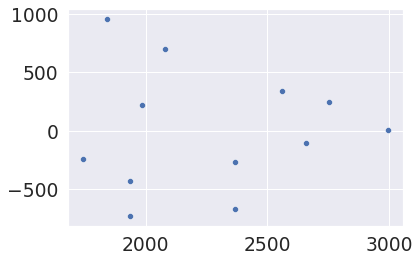

In [34]:
resi_plot = sns.scatterplot(x = resultA.fittedvalues,
                            y = RESIA)

### Conclusión: normal, se ve patrón (campana hacia la derecha)

## Pregunta de Investigación 2:
### Cuál es el impacto de Age, Gender en Salary

Salary = b0 + b1*Age + b2*Gender

In [38]:
modelB =sm.OLS.from_formula('Salary ~ Age + Gender', data = df)
resultB = modelB.fit()
resultB.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0945
Time:                        14:08:01   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observaciones:
- Variable dependiente: Salary
- Variable independiente: Age, Gender
- R-squared: 0.408, por lo tanto, este modelo no es tan eficiente porque explica solo el 40.8% de salary basado...
- Df Model: 2
- Intercept .... > 0.05, no es estafísticamente significativo

`Salary = 749.8157 + 34.2211*Age + 306.7169*Gender_Male`

## Case study: 
Df Model: 2

### Caso 1:
- Age = 33
- Male = True

In [42]:
### Case study: 
print('Salary de una persona con Age 33, Male: \t', 749.8157 + 34.2211*33 + 306.7169*1)

Salary de una persona con Age 33, Male: 	 2185.8289


### Caso 2:
- Age = 33
- Male = False

In [45]:
### Case study: 
print('Salary de una persona con Age 33, Male: \t', 749.8157 + 34.2211*33 + 306.7169*0)
df.iloc[:2, :]

Salary de una persona con Age 33, Male: 	 1879.112


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No


In [46]:
resultB.resid

0    -379.112228
1    -679.112228
2     -20.050251
3    -393.819095
4    -242.227806
5    -487.102178
6     232.412060
7      61.306533
8     989.329983
9     269.296482
10    798.224456
11   -149.145729
dtype: float64

## Pregunta de Investigación 3:
### Cuál es el impacto de Age, Gender, Academic_degree en Salary

Salary = b0 + b1*Age + b2*Gender + b3*Academic_degree

In [48]:
modelC =sm.OLS.from_formula('Salary ~ Age + Gender + Academic_degree', data = df)
resultC = modelC.fit()
resultC.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.636
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.267
Time:                        14:25:03   Log-Likelihood:                -90.426
No. Observations:                  12   AIC:                             190.9
Df Residuals:                       7   BIC:                             193.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   815.5485   1086.544      0.751      0.477   -1753.721    3384.818
Gender[T.Male]              336.1028    521.798      0.644      0.540    -897.752    1569.958
Academic_degree[T.Master]  -373.1962    404.490     -0.923      0.387   -1329.664     583.271
Academic_degree[T.No]       -43.8495    470.054     -0.093      0.928   -1155.350    1067.651
Age                          36.3765     31.992      1.137      0.293     -39.272     112.025
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.427
Skew:                           0.379   Prob(JB):                        0.808
Kurtosis:                       2.472   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observaciones:
- Variable dependiente: Salary
- Variable independiente: Age, Gender, Academic_degree
- R-squared: 0.483, por lo tanto, este modelo no es tan eficiente porque explica solo el 40.8% de salary basado...
- Df Model: 4
- Intercept .... > 0.05, no es estafísticamente significativo

`Salary = 815.5485 + 36.3765*Age + 336.1028*Gender_Male - 373.1962*ADMaster - 43.8495*ADNo`

## Case study: 
Df Model: 4

### Caso 1:
- Age = 48
- Male = True
- ADMaster = True
- ADNo = False

In [51]:
print('Salary de una persona con age 48, Male, con Master: \t', 815.5485 + 36.3765*48 + 336.1028*1 - 373.1962*1 - 43.8495*0)
df.iloc[-1:, :]

Salary de una persona con age 48, Male, con Master: 	 2524.5271000000002


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
11,Male,2550,48,New York,64.0,GM,Master


### Caso 
- Age = 33
- Male = False
- ADMaster = False
- ADNo = False

In [55]:
print('Salary de una persona con age 33, Female, con Bachelos: \t', 815.5485 + 36.3765*33 + 336.1028*0 - 373.1962*0 - 43.8495*0)
df.iloc[:1:, :]

Salary de una persona con age 33, Female, con Bachelos: 	 2015.973


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor


In [56]:
resultC.resid

0    -515.972096
1    -772.122563
2    -188.451404
3    -206.267018
4       2.729975
5    -270.164184
6      73.374548
7    -152.357353
8     856.780852
9     448.227087
10    698.748015
11     25.474139
dtype: float64

## Pregunta de Investigación 4:
### Cuál es el impacto de Gender, Academic_degree en Salary

Salary = b0 + b2*Gender + b3*Academic_degree

In [57]:
modelD =sm.OLS.from_formula('Salary ~ Gender + Academic_degree', data = df)
resultD = modelD.fit()
resultD.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     1.689
Date:                Tue, 30 Nov 2021   Prob (F-statistic):              0.246
Time:                        14:41:06   Log-Likelihood:                -91.443
No. Observations:                  12   AIC:                             190.9
Df Residuals:                       8   BIC:                             192.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1987.2093    350.913      5.663      0.000    1178.002    2796.416
Gender[T.Male]              775.5814    356.912      2.173      0.062     -47.459    1598.622
Academic_degree[T.Master]  -302.5581    406.942     -0.743      0.478   -1240.969     635.853
Academic_degree[T.No]        80.9302    465.356      0.174      0.866    -992.184    1154.044
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.426
Skew:                          -0.000   Prob(JB):                        0.808
Kurtosis:                       2.077   Cond. No.                         4.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observaciones:
- Variable dependiente: Salary
- Variable independiente: Gender, Academic_degree
- R-squared: 0.388, por lo tanto, este modelo no es tan eficiente porque explica solo el 40.8% de salary basado...
- Df Model: 3
- Intercept .... > 0.05, no es estafísticamente significativo

`Salary = 1987.2093 + 775.5814*Gender_Male - 302.5581*ADMaster + 80.9302*ADNo`

## Case study: 
Df Model: 3

### Caso 1:
- Male = False
- ADMaster = False
- ADNo = False

In [60]:
print('Salary de una persona Female, con Bachelor: \t', 1987.2093 + 775.5814*0 - 302.5581*0 + 80.9302*0)

Salary de una persona Female, con Bachelor: 	 1987.2093


In [62]:
resultD.resid

0    -487.209302
1    -868.139535
2    -562.790698
3    -360.232558
4    -184.651163
5      15.348837
6     156.279070
7     237.209302
8     812.790698
9     439.767442
10    711.860465
11     89.767442
dtype: float64